PCA in MNIST Dataset 784D dataset reduced to 2D datasets and visualize using Scatter Plots
-------------------------------------------------------------------------------------------------------------------------------------
Procedure
---------------
- Seperate the data-point from the label
- Apply Column-standardization to the datasets(seperated from labels), let say X is Col_standarized datasets.
- Find the co-variance matrix S i.e X^T.X
- Find the eigen values and eigen vector from S, where S is a symmetric matrix.
- Take the k-largest eigen vectors if we want kD from nD (v1 >= v2 >= v3 >= ............>=Vk)
- Make 1st principal component as v1.X^T
- Make 2nd principal component as v2.X^T ........
- Merge the labels with the new constructed datasets with kD
- Plots the dataset(if k=2) using scatter plots



Implementing PCA
-------------------------------

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings               #to avoid any warnings

warnings.filterwarnings('ignore')

#loading MNIST dataset in d
d=pd.read_csv('train.csv')
#seperating class label and pixel values
label=d['label']
d=d.drop('label',axis=1)


(images, dimension) :  (42000, 784)
(class_label, ) :  (42000,)
The class value is :  4


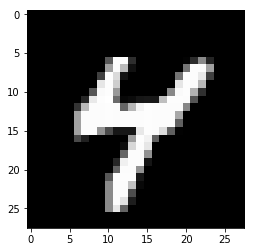

In [28]:
#shape of the dataset
print("(images, dimension) : ",d.shape)
print("(class_label, ) : ",label.shape)

#resize the row into 28x28
index=184
#converting pandas dataframe to numpy array for reshape
np_array=d.iloc[index].values
image_data=np_array.reshape(28,28)

#showing the image on given index
plt.imshow(image_data,interpolation=None,cmap='gray')
print('The class value is : ',label[index])

In [22]:
#Data-preprocessing  =>  Column standarization(mean and std_dev to unit variance)
from sklearn.preprocessing import StandardScaler

std_data=StandardScaler().fit_transform(d)

print("Mean after column standardization on col 5 \n------------------\n",np.mean(std_data[5]))
print("std_dev after column standardization on col 5\n----------------\n",np.std(std_data[5]),end='\n\n')
print("Size :",std_data.shape)


Mean after column standardization on col 5 
------------------
 -0.08164897894312513
std_dev after column standardization on col 5
----------------
 0.5637790150309882

Size : (42000, 784)


In [82]:
#finding the co-variance matrix S [A^T.A]
Sx=np.matmul(std_data.T,std_data)
S=1/42000*Sx
print("Dimension of Covariance matrix S",S.shape)

Dimension of Covariance matrix S (784, 784)


In [83]:
#finding the 2 largest eigen vector (784D->2D)
from scipy.linalg import eigh
#eigen values are stored in ascending maner so 2 largest will
#be on 783 and 782
evalues,evectors=eigh(S,eigvals=(782,783))
evectors_T=evectors.T
print("2 Eigen Vectors(v1,v2) of each size 784\n",evectors_T.shape)

2 Eigen Vectors(v1,v2) of each size 784
 (2, 784)


In [84]:
#new_coordinates=(fx,fy) is the new co-ordinate where we want to project
#fx=[xi^T.v1]
#fy=[xi^T.v2]

print("Dimension of Col_std dataset",std_data.shape)
print("Dimension of Eigen Vector",evectors_T.shape)
new_coordinates=np.matmul(evectors_T,std_data.T)
print("New dimension after PCA",new_coordinates.shape)






Dimension of Col_std dataset (42000, 784)
Dimension of Eigen Vector (2, 784)
New dimension after PCA (2, 42000)


In [85]:
#attaching the labels(0,1,2,3,4,5,6,7,8,9) to calculated coordinates(2-Dimension)
new_coordinates1=np.vstack((new_coordinates,label)).T
#attaching columns name and creating a new dataframe for plotting
dataframe=pd.DataFrame(data=new_coordinates1,columns=("1st principal(v1)","2nd principal(v2)","class_labels"))
print(dataframe.head())

   1st principal(v1)  2nd principal(v2)  class_labels
0          -5.226445          -5.140478           1.0
1           6.032996          19.292332           0.0
2          -1.705813          -7.644503           1.0
3           5.836139          -0.474207           4.0
4           6.024818          26.559574           0.0


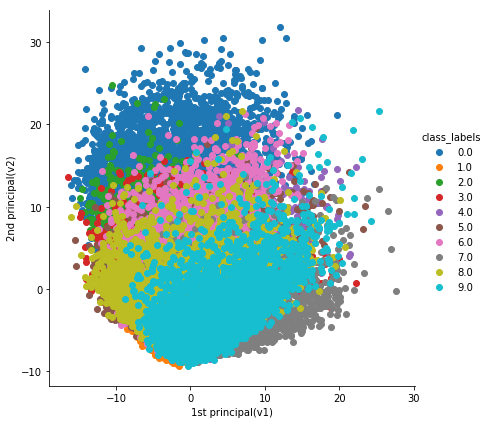

In [86]:
import seaborn as sn
warnings.filterwarnings('ignore')#remove warning

sn.FacetGrid(dataframe,hue="class_labels",size=6).map(plt.scatter,"1st principal(v1)","2nd principal(v2)").add_legend()
plt.show()

PCA using Scikit-Learn
---------------------------------
- Note, here also we need to used column standardize data only.
- 'std_data' is preprocessed-data not the raw-data

In [33]:
from sklearn import decomposition
pca=decomposition.PCA()

In [68]:
#defining dimension of output datasets
#use the column-standardized data : std_data is column standardized data
pca.n_components=2
print("Dimenstion before applying PCA is ",std_data.shape)
transformed_data=pca.fit_transform(std_data)
print("Dimenstion after applying PCA is ",transformed_data.shape)

Dimenstion before applying PCA is  (42000, 784)
Dimenstion after applying PCA is  (42000, 2)


In [69]:
#attaching the labels(0,1,2,3,4,5,6,7,8,9) to calculated coordinates(2-Dimension)
transformed_data1=np.vstack((transformed_data.T,label)).T


   1st principal(v1)  2nd principal(v2)  class_labels
0          -5.140524          -5.226777           1.0
1          19.292265           6.032601           0.0
2          -7.644516          -1.705870           1.0
3          -0.474328           5.835101           4.0
4          26.559611           6.025192           0.0


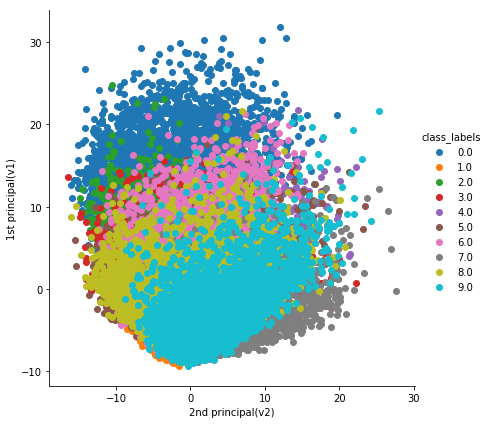

In [72]:
#creating a new panda datafram for plotting
dataframe_pca=pd.DataFrame(data=transformed_data1,columns=("1st principal(v1)","2nd principal(v2)","class_labels"))
print(dataframe_pca.head())
#plotting
sn.FacetGrid(dataframe_pca,hue="class_labels",size=6).map(plt.scatter,"2nd principal(v2)","1st principal(v1)").add_legend()
plt.show()

PCA not for Data-visualisation
--------------------------------------------  
- Observing the nature of the variance explained (% of infomation preserved)

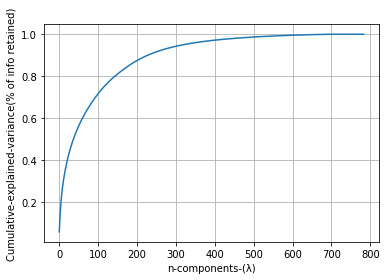

In [93]:
#from 784 Datapoint to 784 Principal components
pca.n_components=784
d=pca.fit_transform(std_data)

#explained variance is expected % of information preserved

#computing for each i:1->784, λi/(Σλj for j= 1 to 784)
info_preserved_for_each_eigenValue=pca.explained_variance_ /np.sum(pca.explained_variance_)

#computing λ1/(Σλi for j= 1 to 784), (λ1+λ2)/(Σλi for j= 1 to 784), (λ1+λ2+λ3)/(Σλi for j= 1 to 784),......
cummulative_exp_var=np.cumsum(info_preserved_for_each_eigenValue)

plt.plot(cummulative_exp_var)
plt.grid()
plt.xlabel('n-components-(λ)')
plt.ylabel('Cumulative-explained-variance(% of info retained)')
plt.show()


- Note when we are increasing the dimension in X-axis the % of Variance is also increased.
- For example if we want to retain 95% of variance retained then we choce d' as 350